# Distribución de Frecuencias - Histogramas
## Altura de las personas
### Situación
+ Se obtuvieron las estaturas de estudiantes de estadística como parte de un experimento para la clase. 
    + La lista con las alturas se daño.
    + Quedó solo una lista con los ultimos dígitos de estas alturas.
+ A continuación se presenta una lista de los últimos dígitos de tales estaturas.
    + 0000000001123334555555555555555668889
+ Construya una distribución de frecuencias con 10 clases. 
+ Con base en la distribución, ¿parece que las estaturas se reportaron o que se midieron realmente? 
+ ¿Qué sabe usted acerca de la exactitud de los resultados?

## Construcción de la distribución de Frecuencias

### Construcción con numpy, sin gráficos

In [3]:
import numpy as np

In [8]:
np.histogram(a=[0,0,0,0,0,0,0,0,0,1,1,2,3,3,3,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,6,6,8,8,8,9],
             bins=[0,1,2,3,4,5,6,7,8,9,10],
             range=None,
             weights=None)

(array([ 9,  2,  1,  3,  1, 15,  2,  0,  3,  1], dtype=int64),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]))

### Construcción con graficos matplotlib

In [19]:
import matplotlib.pyplot as plt

(array([ 9.,  2.,  1.,  3.,  1., 15.,  2.,  0.,  3.,  1.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

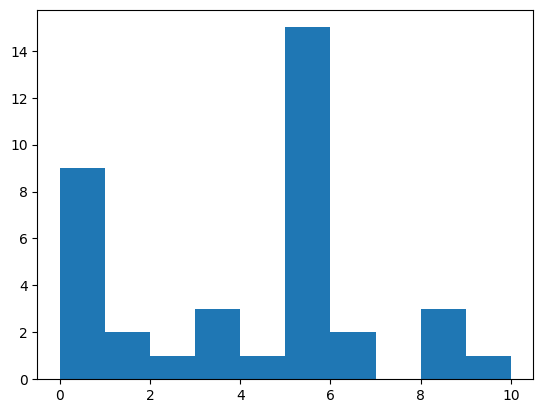

In [14]:
plt.hist(x=[0,0,0,0,0,0,0,0,0,1,1,2,3,3,3,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,6,6,8,8,8,9], bins=[0,1,2,3,4,5,6,7,8,9,10], align='mid')

### Construcción con gráficos seaborn

In [16]:
import seaborn as sns

<Axes: ylabel='Count'>

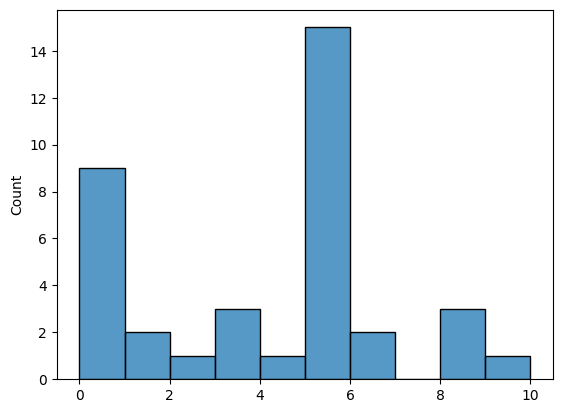

In [18]:
sns.histplot(data=[0,0,0,0,0,0,0,0,0,1,1,2,3,3,3,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,6,6,8,8,8,9], bins=[0,1,2,3,4,5,6,7,8,9,10])

## Conclusiones
+ Hay una enorme cantidad de datos que terminan en 5 (15) y en 0 (5)
+ Esto da indicios que no se produjeron mediciones precisas sino que
    + los datos deben haber sido cargados a mano y demanra aproximada.
    + (1,5 y 1,50, son datos más sencillos de cargar que 1,53 o 1,57)
Esto no es concluyente pero sí es un indicio probable dado que la información es incompleta.
Por lo tanto se puede decir que es porbable que los datos se habíen informado de manera aproximada.

## Análisis alternativo con pandas
###  Construcción con pandas

In [21]:
import pandas as pd


In [24]:

# Armado de una lista con Últimos dígitos de las estaturas
ultimos_digitos = [int(d) for d in "0000000001123334555555555555555668889"]
print(ultimos_digitos)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 3, 3, 3, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 8, 8, 8, 9]


In [27]:

# Conteo de la frecuencia de cada último dígito y creación de un diccionario
frecuencia_ultimos_digitos = {i: ultimos_digitos.count(i) for i in range(10)}
print("Frecuencia de los ultimos digitos")
print(frecuencia_ultimos_digitos)


Frecuencia de los ultimos digitos
{0: 9, 1: 2, 2: 1, 3: 3, 4: 1, 5: 15, 6: 2, 7: 0, 8: 3, 9: 1}


In [26]:

# Creación de un DataFrame con los datos de frecuencia
df = pd.DataFrame({'Ultimo Dígito': list(frecuencia_ultimos_digitos.keys()),
                   'Frecuencia': list(frecuencia_ultimos_digitos.values())})
df

,Ultimo Dígito,Frecuencia
0,0,9
1,1,2
2,2,1
3,3,3
4,4,1
5,5,15
6,6,2
7,7,0
8,8,3
9,9,1


In [28]:

# Calcular el ancho de cada clase
clases = 10
ancho_clase = (max(df['Ultimo Dígito']) - min(df['Ultimo Dígito']) + 1) / clases

# Crear los límites de cada clase
limites_clases = [min(df['Ultimo Dígito']) + i * ancho_clase for i in range(clases)]
limites_clases.append(max(df['Ultimo Dígito']) + ancho_clase)  # Agregar el último límite

# Crear las clases
df['Clase'] = pd.cut(df['Ultimo Dígito'], bins=limites_clases, right=False)

# Agregar una fila para los valores que están en el último límite
if len(df['Clase'].unique()) > clases:
    df.loc[len(df)] = [max(df['Ultimo Dígito']), 0, pd.Interval(left=max(df['Ultimo Dígito']), right=max(df['Ultimo Dígito']))]
df

,Ultimo Dígito,Frecuencia,Clase
0,0,9,"[0.0, 1.0)"
1,1,2,"[1.0, 2.0)"
2,2,1,"[2.0, 3.0)"
3,3,3,"[3.0, 4.0)"
4,4,1,"[4.0, 5.0)"
5,5,15,"[5.0, 6.0)"
6,6,2,"[6.0, 7.0)"
7,7,0,"[7.0, 8.0)"
8,8,3,"[8.0, 9.0)"
9,9,1,"[9.0, 10.0)"


In [29]:

# Agrupar por clase y sumar la frecuencia
df_agrupado = df.groupby('Clase').sum().reset_index()
df

C:\Users\Dani\AppData\Local\Temp\ipykernel_24756\1106448759.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_agrupado = df.groupby('Clase').sum().reset_index()


,Ultimo Dígito,Frecuencia,Clase
0,0,9,"[0.0, 1.0)"
1,1,2,"[1.0, 2.0)"
2,2,1,"[2.0, 3.0)"
3,3,3,"[3.0, 4.0)"
4,4,1,"[4.0, 5.0)"
5,5,15,"[5.0, 6.0)"
6,6,2,"[6.0, 7.0)"
7,7,0,"[7.0, 8.0)"
8,8,3,"[8.0, 9.0)"
9,9,1,"[9.0, 10.0)"


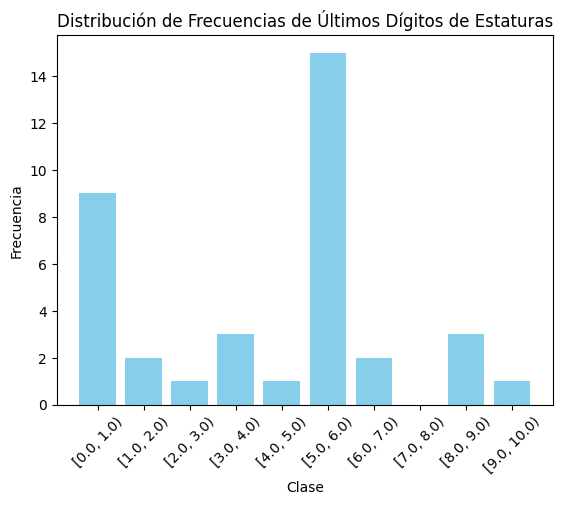

In [30]:

# Graficar la distribución de frecuencias
plt.bar(df_agrupado['Clase'].astype(str), df_agrupado['Frecuencia'], color='skyblue')
plt.title('Distribución de Frecuencias de Últimos Dígitos de Estaturas')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()
